# step 1: import required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# step 2 : import the data

In [2]:
df = pd.read_csv("audi.csv")

display (df)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4


# step 3: checking for missing value and data type

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

# step 4 : Count the number of unique values present in the 'year' column

In [4]:
year_count = df['year'].value_counts()
display(year_count)

2019    3197
2016    1964
2017    1935
2015     999
2018     864
2020     716
2014     447
2013     291
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1997       1
1998       1
Name: year, dtype: int64

# step 5 : Count the number of unique values present in the 'model' column

In [5]:
model_count = df['model'].value_counts()
display(model_count)

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

# step 6: Count the number of unique values present in the 'transmission' column

In [6]:
transmission_count = df['transmission'].value_counts()
display (transmission_count)

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

# step 7: Count the number of unique values present in the 'fuelType' column

In [7]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

# step 8 : Find the percentage of unique values present in the 'fuelType' column

In [8]:
fuelType_count = df['fuelType'].value_counts()
print(type(fuelType_count))

<class 'pandas.core.series.Series'>


In [9]:
fuelType_count = pd.DataFrame(fuelType_count)
display(fuelType_count)

,fuelType
Diesel,5577
Petrol,5063
Hybrid,28


In [10]:

fuelType_count = fuelType_count.reset_index()
display(fuelType_count)

,index,fuelType
0,Diesel,5577
1,Petrol,5063
2,Hybrid,28


In [11]:
fuelType_count = fuelType_count.rename(columns={'index':'fuel_type', 'fuelType':'No_of_cars'})
display(fuelType_count)

,fuel_type,No_of_cars
0,Diesel,5577
1,Petrol,5063
2,Hybrid,28


In [12]:
print(fuelType_count['No_of_cars'].sum())

10668


In [13]:
fuelType_count['% of cars'] = np.round(((fuelType_count['No_of_cars']/fuelType_count['No_of_cars'].sum())*100), 2)
display(fuelType_count)

,fuel_type,No_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


In [14]:
print(type(fuelType_count))

<class 'pandas.core.frame.DataFrame'>


# step 9 : create a Bar plot for the fuelType columns

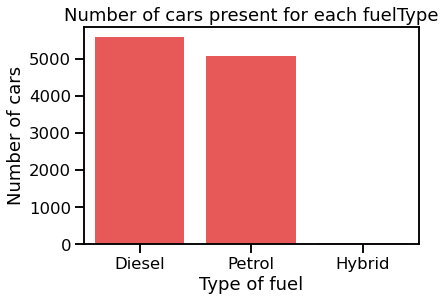

In [15]:
sns.barplot(x='fuel_type', y='No_of_cars', data=fuelType_count, color='red', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Number of cars")
plt.show()


# step 10 : Find the percentage of unique values present in the 'transmission' column

In [16]:

transmission_count = df['transmission'].value_counts()
print(type(transmission_count))

<class 'pandas.core.series.Series'>


In [17]:
transmission_count = pd.DataFrame(transmission_count)
display(transmission_count)

,transmission
Manual,4369
Semi-Auto,3591
Automatic,2708


In [18]:
transmission_count = transmission_count.reset_index()
display(transmission_count)

,index,transmission
0,Manual,4369
1,Semi-Auto,3591
2,Automatic,2708


In [19]:
transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'No_of_cars'})
display(transmission_count)

,transmission,No_of_cars
0,Manual,4369
1,Semi-Auto,3591
2,Automatic,2708


In [20]:
print(transmission_count['No_of_cars'].sum())

10668


In [21]:
transmission_count['% of cars'] = np.round(((transmission_count['No_of_cars']/transmission_count['No_of_cars'].sum())*100), 2)
display(transmission_count)

,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


In [22]:
print(type(transmission_count))

<class 'pandas.core.frame.DataFrame'>


# step 11 : Create a Barplot for the 'transmission' column

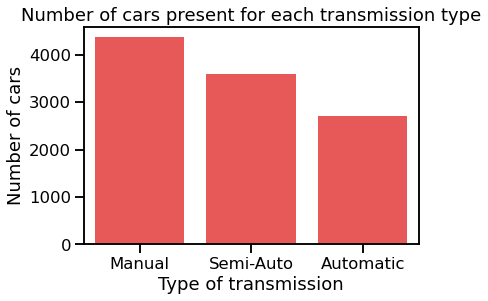

In [23]:
sns.barplot(x='transmission', y='No_of_cars', data=transmission_count, color='red', alpha=0.75)
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")
plt.show()

# step 12 : Find the percentage of unique values present in the 'model' column

In [24]:
model_count = df['model'].value_counts()
print(type(model_count))

<class 'pandas.core.series.Series'>


In [25]:
model_count = pd.DataFrame(model_count)
display(model_count)

,model
A3,1929
Q3,1417
A4,1381
A1,1347
A5,882
Q5,877
Q2,822
A6,748
Q7,397
TT,336


In [26]:
model_count = model_count.reset_index()
display(model_count)

,index,model
0,A3,1929
1,Q3,1417
2,A4,1381
3,A1,1347
4,A5,882
5,Q5,877
6,Q2,822
7,A6,748
8,Q7,397
9,TT,336


In [27]:
model_count = model_count.rename(columns={'index':'model', 'model':'No_of_cars'})
display(model_count)

,model,No_of_cars
0,A3,1929
1,Q3,1417
2,A4,1381
3,A1,1347
4,A5,882
5,Q5,877
6,Q2,822
7,A6,748
8,Q7,397
9,TT,336


In [28]:
print(model_count['No_of_cars'].sum())

10668


In [29]:
model_count['% of cars'] = np.round(((model_count['No_of_cars']/model_count['No_of_cars'].sum())*100), 2)
display(model_count)

,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27
5,Q5,877,8.22
6,Q2,822,7.71
7,A6,748,7.01
8,Q7,397,3.72
9,TT,336,3.15


In [30]:
print(type(model_count))

<class 'pandas.core.frame.DataFrame'>


# step 13 : Create a Barplot for the 'model' column

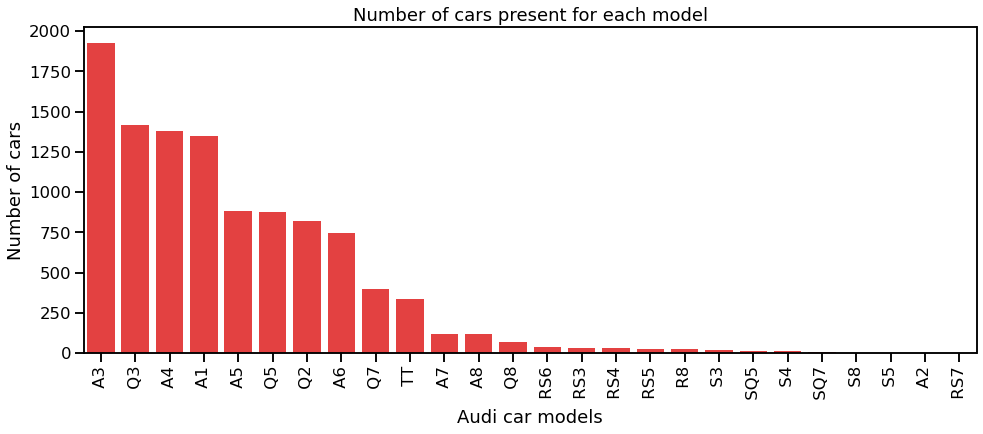

In [31]:
plt.figure(figsize=(16,6))

sns.barplot(x='model', y='No_of_cars', data=model_count, color='red', alpha=0.85)
#alpha=0.85 = opacity level 

plt.title("Number of cars present for each model")


plt.xlabel("Audi car models")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

# plt.xticks(rotation=#) where # can be any angle by which we want to rotate the x labels


plt.show()

# step 14: create subplots

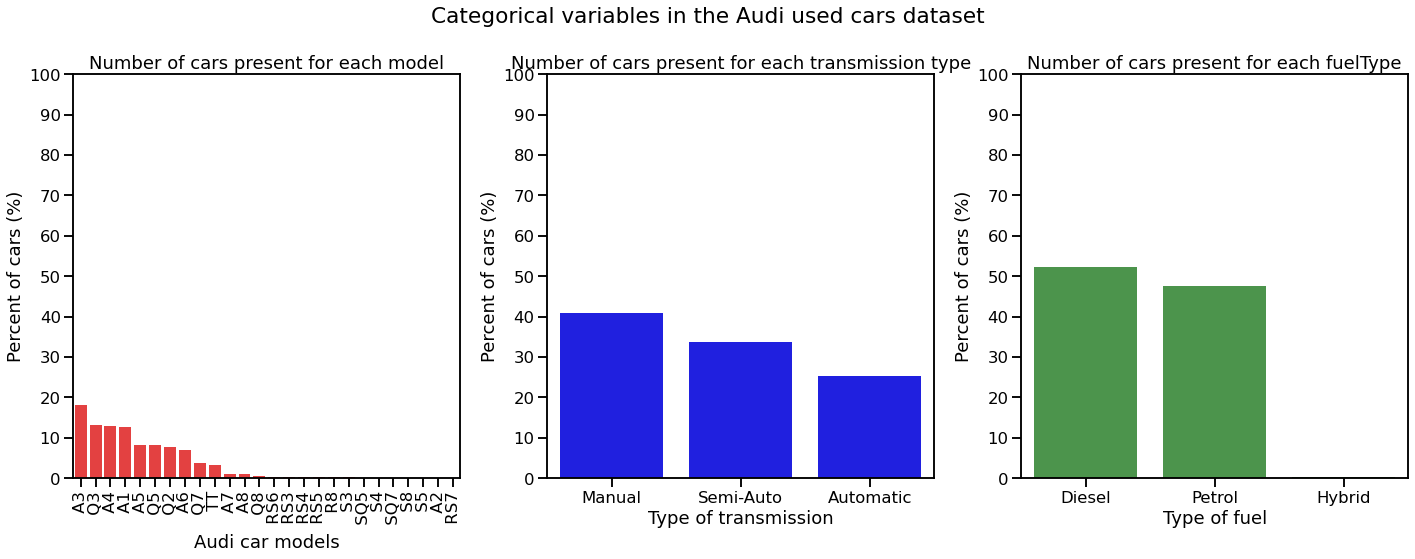

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='red', alpha=0.85)

##alpha=0.85 = opacity level

plt.title("Number of cars present for each model")
plt.xlabel("Audi car models")
plt.ylabel("Percent of cars (%)")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,10).tolist())

#plt.yticks (np.arange (0, 101, step=10)) cover the range 0 to 101,will give a plot with 10 difference between each tick

#tolist (), used to convert the data elements of an array into a list

plt.subplot(1,3,2)
sns.barplot(x='transmission', y='% of cars', data=transmission_count, color='blue')
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,101,10).tolist())

plt.subplot(1,3,3)
sns.barplot(x='fuel_type', y='% of cars', data=fuelType_count, color='green', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,101,10).tolist())

plt.suptitle("Categorical variables in the Audi used cars dataset")
plt.tight_layout()
plt.show()


# step 15: Create a function to find the number of observations for unique value in a column of a DataFrame

In [33]:
def unique_val_count(data, column):
    
    #Count unique values in each column of the dataframe
    
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    #The round () function returns a floating point number that is a rounded version of the specified number
    #df_count[] = used to count the no. of null observations across the given axis.
    
    # 2 is for two digits after the decimal point in a float variable
    
    return df_count

In [34]:

# value_counts() method to easily count the unique occurences of values

model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [35]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
year_count

,year,No_of_cars,% of cars
19,1997,1,0.01
20,1998,1,0.01
18,2002,2,0.02
16,2003,6,0.06
17,2004,5,0.05
15,2005,7,0.07
14,2006,9,0.08
13,2007,16,0.15
12,2008,21,0.20
11,2009,23,0.22


# step 16 : Create a function to show the number of observations for each unique value in a column using a barplot

In [36]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

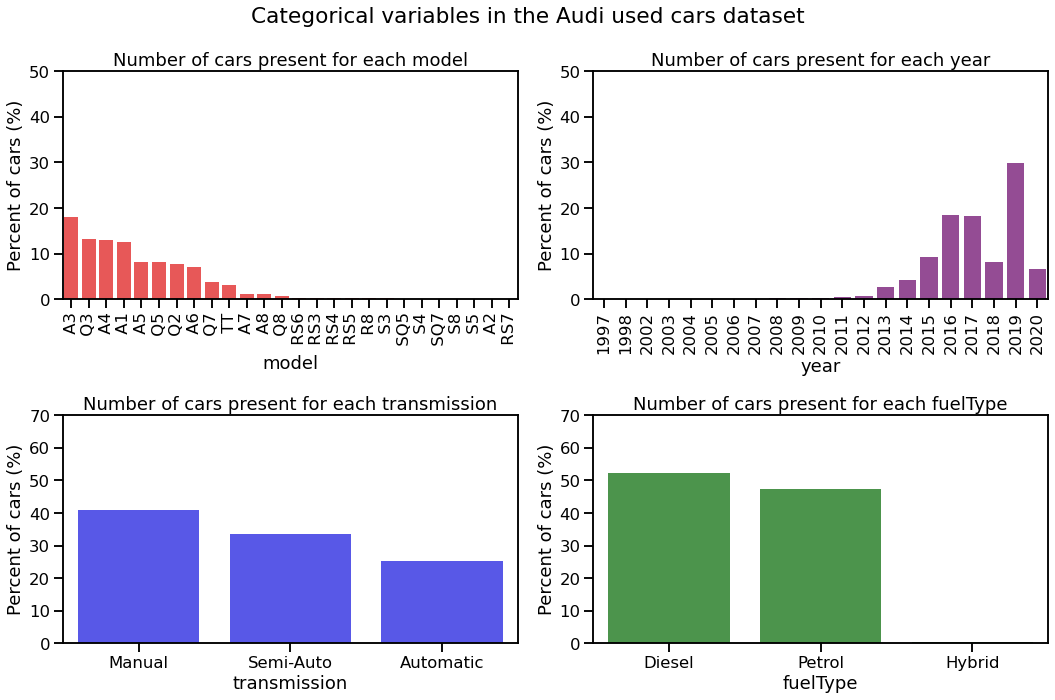

In [37]:
plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'red', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'purple', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'blue', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'green', 0, np.arange(0,71,10))

# write the title for all the plots
plt.suptitle("Categorical variables in the Audi used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

# step 17 :  Create scatterplot (one or more) with the numeric columns also add trend line,add a categorical column as hue

In [38]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


there is 4 numeric columns : price, mileage, mpg, engine size,

lets create a scatter plot for this numeric columns

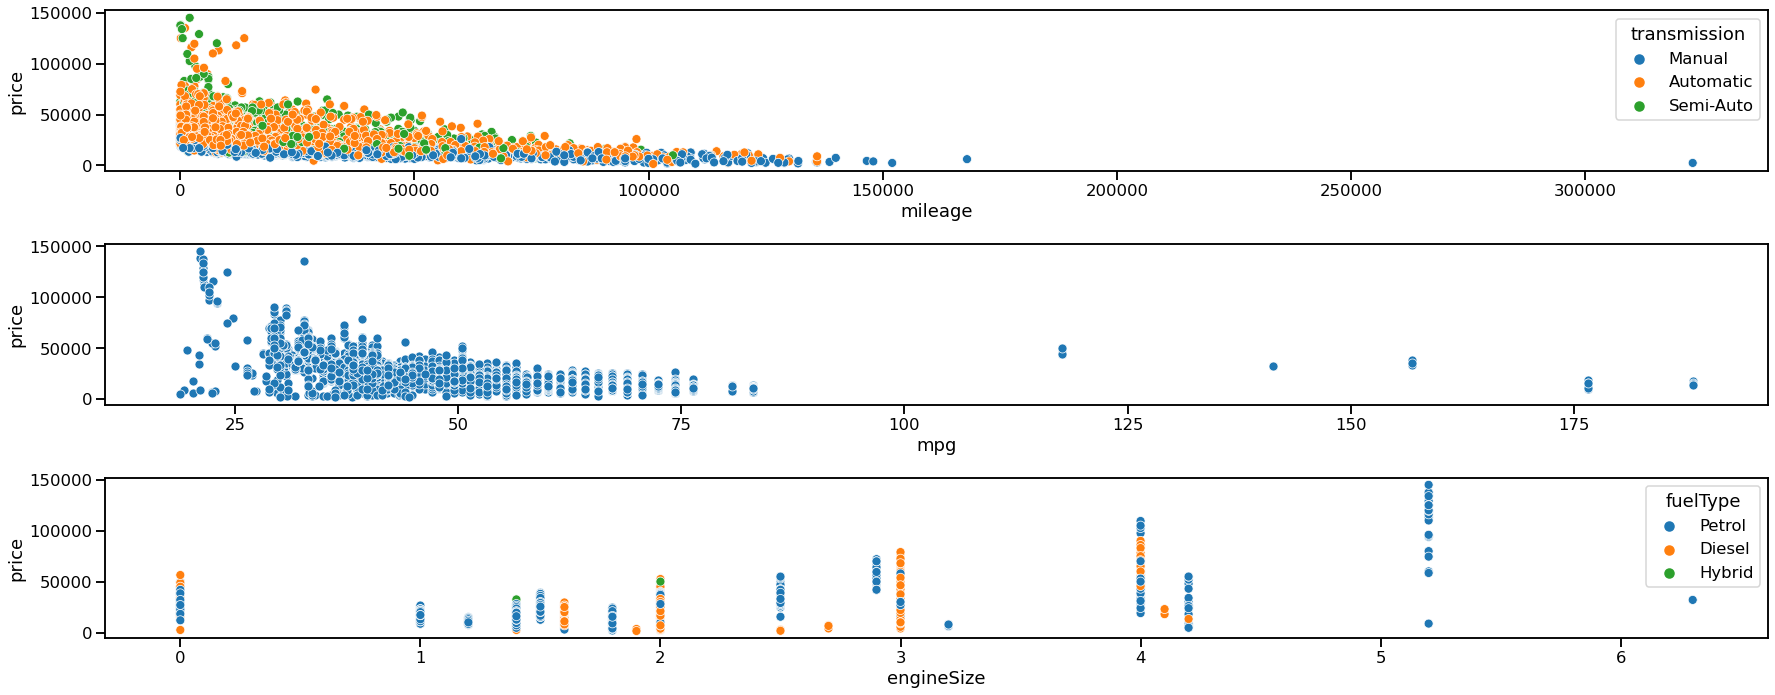

In [46]:
sns.set_context('talk')
plt.figure(figsize = (25,10))

plt.title("Scatter Plot present for Audi used car dataset")
plt.subplot(3,1,1)


#plt.subplot(3,1,1) = 3 row, 1 coulums, position = 1

sns.scatterplot(x='mileage',y ='price' ,data=df , hue='transmission')

#hue represents categorical columns

plt.subplot(3,1,2)

#plt.subplot(3,1,2) = 3 row, 1 coulums, position = 2

sns.scatterplot(x='mpg',y ='price' ,data=df)

plt.subplot(3,1,3)

#plt.subplot(3,1,3) = 3 row, 1 coulums, position = 3

sns.scatterplot(x='engineSize',y ='price' ,data=df , hue='fuelType')

plt.tight_layout()

plt.show()


# step 18 : add a trend line

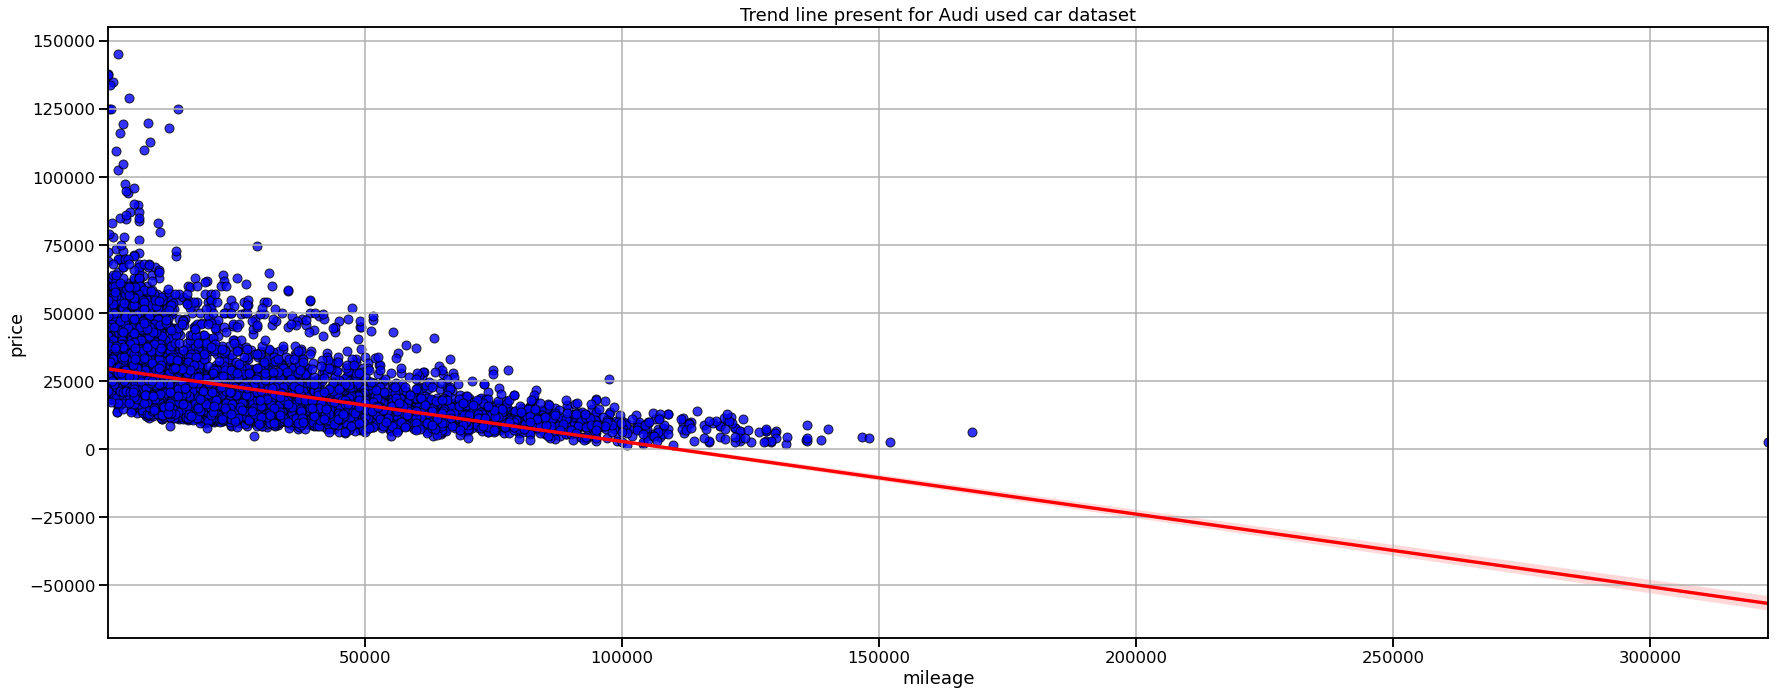

In [43]:

plt.figure(figsize = (25,10))

plt.title("Trend line present for Audi used car dataset")
sns.regplot(x='mileage',y ='price' ,data=df , line_kws = {'color' :'red'},
            scatter_kws = {'color' :'blue', 'edgecolor' : 'black'})

plt.grid()


plt.tight_layout()

plt.show()


# step 19 : create histogram using seaborn

AttributeError: module 'seaborn' has no attribute 'hisplot'

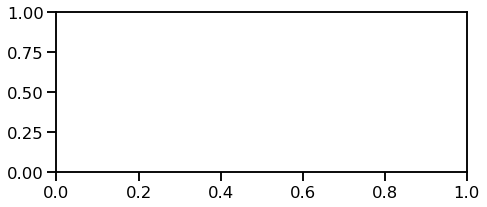

In [47]:
plt.figure(figsize = (25,10))
plt.subplot(3,3,1)
sns.hisplot(data = df , x = 'Total_calls' , binwidth = 20)
plt.tight_layout()

plt.show()

